In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os



In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/heart_failure_clinical_records_dataset.csv")

In [ ]:
df.head()

##TENGO LA DATA LIMPIA Y AHORA?

#### TODO ESTO ES UN RESUMEN GUIA, NO SON LOS DATASETS Q VAMOS A USAR

### SEPARO EN TEST Y TRAIN




In [7]:
from sklearn.model_selection import train_test_split

feat_train, feat_test, targ_train, targ_test = train_test_split(df.drop(["DEATH_EVENT"],axis=1),df["DEATH_EVENT"],test_size=0.2)

### FORMA REGRESEAR

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

grado = 1

modelo = Pipeline([["poly",PolynomialFeatures(degree=grado,include_bias=True)],["regressor",LinearRegression(fit_intercept=False)]])

modelo.fit(feat_train,targ_train)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ['regressor',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False)]],
         verbose=False)

In [ ]:
modelo["regressor"].coef_

In [59]:
from sklearn.metrics import mean_squared_error as mse

np.sqrt(mse(targ_test,modelo.predict(feat_test)))

0.3743389714724081

In [82]:
from sklearn.model_selection import GridSearchCV

hyperparam = {"features__degree":[n for n in range(1,6)]}
#CUANDO HAGO GRILLA PONGO FEATURES
modelo = Pipeline([["features",PolynomialFeatures(degree=grado,include_bias=True)],["regressor",LinearRegression(fit_intercept=False)]])
grilla = GridSearchCV(modelo,hyperparam,refit=True,cv=len(feat_train),scoring="neg_mean_squared_error",verbose=True,n_jobs=-1)
grilla.fit(feat_train,targ_train)


Fitting 239 folds for each of 5 candidates, totalling 1195 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 1191 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 1195 out of 1195 | elapsed:   46.8s finished


GridSearchCV(cv=239, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[['features',
                                        PolynomialFeatures(degree=1,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')],
                                       ['regressor',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=False,
                                                         n_jobs=None,
                                                         normalize=False)]],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'features__degree': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train

In [83]:
print(grilla.best_params_)

{'features__degree': 1}


1 0.1450161155301589
2 0.22012380342353507
3 18.47691344218542
4 2396.4888133696545
5 1010.4020576015844


Text(0, 0.5, 'RMSE en validacion')

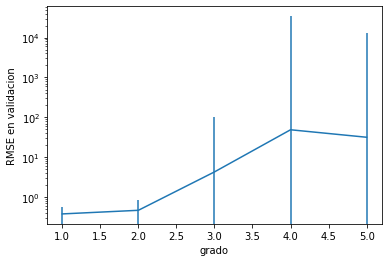

In [85]:
for ni, i in enumerate(grilla.cv_results_['params']):
  print(i['features__degree'],-grilla.cv_results_['mean_test_score'][ni])
plt.errorbar(grilla.cv_results_['param_features__degree'].data,np.sqrt(-grilla.cv_results_['mean_test_score']),yerr=grilla.cv_results_['std_test_score'])
plt.yscale('log')
plt.xlabel('grado')
plt.ylabel('RMSE en validacion')

In [84]:
besthyper_model = grilla.best_estimator_

np.sqrt(mse(targ_test,besthyper_model.predict(feat_test)))

0.3743389714724081

0.3743389714724081